Decision Tree

In [1]:
import pandas 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df=pandas.read_csv("dataSet.csv")

In [3]:
d={'uk':0,'usa':1,'n':2} 
df['nationality']=df['nationality'].map(d) 
d={'yes':1,'no':0} 
df['go']=df['go'].map(d)

In [4]:
features=['age','experience','rank','nationality'] 
X=df[features] 
y=df['go'] 

[1]


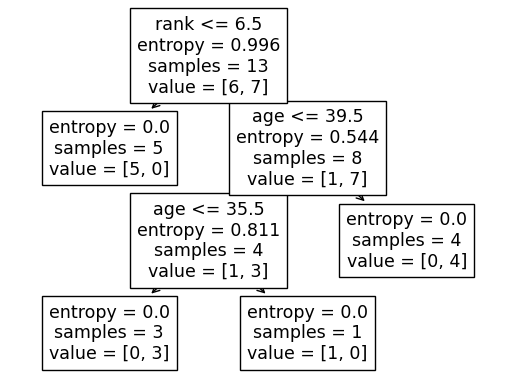

In [5]:
dtree=DecisionTreeClassifier(criterion='entropy') 
dtree=dtree.fit(X.values,y) 
tree.plot_tree(dtree,feature_names=features) 
print(dtree.predict([[40,10,7,1]]))

KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import random

In [7]:
data_iris=load_iris() 
label_target=data_iris.target_names 

In [9]:
print() 
print("Sample data from the iris dataset: ") 
print("*"*30) 
for i in range(10): 
  rn=random.randint(0,120) 
  print(data_iris.data[rn],"==>",label_target[data_iris.target[rn]])


Sample data from the iris dataset: 
******************************
[5.1 2.5 3.  1.1] ==> versicolor
[6.3 3.3 6.  2.5] ==> virginica
[5.4 3.4 1.7 0.2] ==> setosa
[5.6 2.9 3.6 1.3] ==> versicolor
[5.5 4.2 1.4 0.2] ==> setosa
[5.2 2.7 3.9 1.4] ==> versicolor
[4.6 3.4 1.4 0.3] ==> setosa
[6.  2.9 4.5 1.5] ==> versicolor
[7.1 3.  5.9 2.1] ==> virginica
[4.8 3.1 1.6 0.2] ==> setosa


In [11]:
X=data_iris.data 
y=data_iris.target 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [12]:
print("The training dataset length: ",len(X_train)) 
print("The testing dataset length: ",len(X_test))

The training dataset length:  120
The testing dataset length:  30


In [13]:
try: 
  nn=int(input("Enter number of neighbors: ")) 
  knn=KNeighborsClassifier(nn) 
  knn.fit(X_train,y_train) 
  test_data=input("Enter test data: ").split(",") 
  for i in range(len(test_data)): 
    test_data[i]=float(test_data[i]) 
  print() 
  v=knn.predict([test_data]) 
  print("Predicted output is: ", label_target[v]) 
except: 
  print("Please provide valid input...")

Enter number of neighbors:  5
Enter test data:  5.5,2.4,5.5,5.0



Predicted output is:  ['virginica']


Linear Regression

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
np.random.seed(0) 

In [15]:
X=2*np.random.rand(100,1) 
y=4+3*X + np.random.randn(100,1)

In [16]:
model=LinearRegression() 
model.fit(X,y)

LinearRegression()

In [17]:
X_new=np.array([[0],[2]]) 
y_predict=model.predict(X_new)

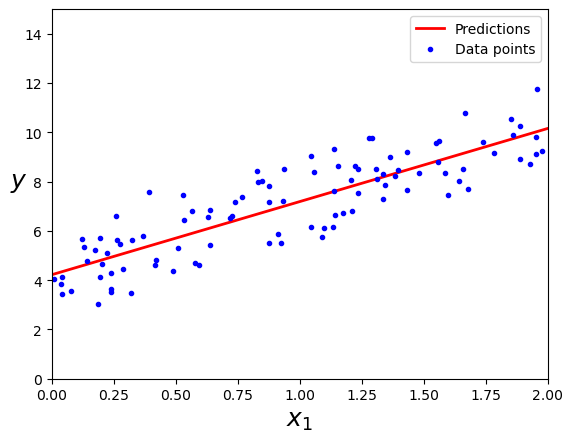

In [18]:
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions") 
plt.plot(X,y,"b.",label="Data points") 
plt.xlabel("$x_1$",fontsize=18) 
plt.ylabel("$y$",rotation=0,fontsize=18) 
plt.legend() 
plt.axis([0,2,0,15]) 
plt.show()

In [19]:
print("Intercept: ",model.intercept_) 
print("Coefficient: ", model.coef_) 

Intercept:  [4.22215108]
Coefficient:  [[2.96846751]]


Logistic Regression

In [20]:
import warnings 
warnings.filterwarnings("ignore") 
import numpy 
from sklearn import linear_model 
%matplotlib inline

In [21]:
X=numpy.array([3.78,2.44,2.09,0.14,1.72,1.65,4.92,4.37,4.96,4.52,3.69,5.88]).reshape(-1,1) 
y=numpy.array([0,0,0,0,0,0,1,1,1,1,1,1]) 

In [22]:
logr=linear_model.LogisticRegression() 
logr.fit(X,y)

LogisticRegression()

In [23]:
predicted=logr.predict(numpy.array([3.46]).reshape(-1,1)) 
print(predicted)

[0]


Naive Bayes

In [24]:
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [26]:
data={ 
'outlook': 
['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy'], 
'temp': 
['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild'], 
'humidity': 
['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high'], 
'windy': 
['false','true','false','false','false','true','true','false','false','false','true','true','false','true'], 
'play': 
['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no'] 
}

In [27]:
df=pd.DataFrame(data) 
df 


,outlook,temp,humidity,windy,play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [28]:
df_c=df.astype('category') 
df_c["outlook"]=df_c["outlook"].cat.codes 
df_c["temp"]=df_c["temp"].cat.codes 
df_c["humidity"]=df_c["humidity"].cat.codes 
df_c["windy"]=df_c["windy"].cat.codes 
df_c["play"]=df_c["play"].cat.codes

In [29]:
df_c.head(14)

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [30]:
X=df_c.iloc[:,:4].values 
X

array([[2, 1, 0, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [1, 2, 1, 0],
       [2, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 1]], dtype=int8)

In [31]:
Y=df_c.iloc[:,4].values 
Y 

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int8)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45) 
print(X_train.shape,y_train.shape)

(11, 4) (11,)


In [34]:
model=GaussianNB() 
model.fit(X_train,y_train) 
predicted=model.predict([[0,2,2,1]]) 
print("Predicted value: ",predicted)

Predicted value:  [1]


Synthetic Classification Dataset

In [35]:
from sklearn.datasets import make_classification 

In [36]:
X,y=make_classification(n_samples=10,n_features=5,n_informative=2,n_redundant=2,random_state=1)

In [37]:
print(X.shape,y.shape) 
print(X) 


(10, 5) (10,)
[[-0.19183555  1.05492298 -0.7290756  -1.14651383  1.44634283]
 [-1.11731035  0.79495321  3.11651775 -2.85961623 -1.52637437]
 [ 0.2344157  -1.92617151  2.43027958  1.49509867 -3.42524143]
 [-0.67124613  0.72558433  1.73994406 -2.00875146 -0.60483688]
 [-0.0126646   0.14092825  2.41932059 -1.52320683 -1.60290743]
 [ 1.6924546   0.0230103  -1.07460638  0.55132541  0.78712117]
 [ 0.74204416 -1.91437196  3.84266872  0.70896364 -4.42287433]
 [-0.74715829 -0.36632248 -2.17641632  1.72073855  1.23169963]
 [-0.88762896  0.59936399 -1.18938753 -0.22942496  1.37496472]
 [ 1.65980218 -1.04052679  0.89368622  1.03584131 -1.55118469]]


Ensemble Algorithms
{Bagging Classification}

In [42]:
from sklearn.datasets import make_classification 
from sklearn.ensemble import BaggingClassifier

In [43]:
X,y=make_classification(n_samples=10,n_features=5,n_informative=2,n_redundant=2,random_state=1)

In [45]:
model=BaggingClassifier() 
model.fit(X,y)

BaggingClassifier()

In [46]:
row=[[1.65980218,-1.04052679,0.89368622,1.03584131,-1.55118469]] 
yhat=model.predict(row) 
print('Predicted class: %d' %yhat)

Predicted class: 1


Boosting Algorithm

In [47]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_classification

In [48]:
X,y=make_classification(n_samples=10,n_features=5,n_informative=2,n_redundant=2,random_state=1)

In [49]:
cl=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)

In [50]:
cl.fit(X,y) 
print(X.shape,y.shape) 

(10, 5) (10,)


In [51]:
print(X)

[[-0.19183555  1.05492298 -0.7290756  -1.14651383  1.44634283]
 [-1.11731035  0.79495321  3.11651775 -2.85961623 -1.52637437]
 [ 0.2344157  -1.92617151  2.43027958  1.49509867 -3.42524143]
 [-0.67124613  0.72558433  1.73994406 -2.00875146 -0.60483688]
 [-0.0126646   0.14092825  2.41932059 -1.52320683 -1.60290743]
 [ 1.6924546   0.0230103  -1.07460638  0.55132541  0.78712117]
 [ 0.74204416 -1.91437196  3.84266872  0.70896364 -4.42287433]
 [-0.74715829 -0.36632248 -2.17641632  1.72073855  1.23169963]
 [-0.88762896  0.59936399 -1.18938753 -0.22942496  1.37496472]
 [ 1.65980218 -1.04052679  0.89368622  1.03584131 -1.55118469]]


In [52]:
row=[[0.191,1.054,-0.729,-1.146,1.446]] 
yhat=cl.predict(row) 
print('Predicted class: %d' %yhat[0])

Predicted class: 0


Random Forest

In [10]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV,train_test_split 

In [11]:
bank_data=pd.read_csv("bank.csv") 
bank_data=bank_data.loc[:,['age','default','cons.price','cons.conf','y']] 
bank_data.head(5)

,age,default,cons.price,cons.conf,y
0,30,no,92.893,-46.2,no
1,50,yes,93.994,-36.4,yes
2,35,no,93.075,-42.8,no
3,40,unknown,92.201,-26.9,yes
4,55,no,93.918,-31.4,yes


In [12]:
bank_data.head(5)

,age,default,cons.price,cons.conf,y
0,30,no,92.893,-46.2,no
1,50,yes,93.994,-36.4,yes
2,35,no,93.075,-42.8,no
3,40,unknown,92.201,-26.9,yes
4,55,no,93.918,-31.4,yes


In [13]:
bank_data['default']=bank_data['default'].map({'no':0,'yes':1,'unknown':0}) 
bank_data['y']=bank_data['y'].map({'no':0,'yes':1}) 

In [14]:
X=bank_data.drop('y',axis=1) 
y=bank_data['y'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
rf=RandomForestClassifier() 
rf.fit(X_train,y_train) 
row=[[1,57,0,93.994]] 
y_pred=rf.predict(row) 
print('Prediction: ',y_pred)

Prediction:  [1]


D:\Documents\one\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Fuzzy C-Means

In [20]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
np.random.seed(0)

In [21]:
data=np.random.rand(100,2) 
n_clusters=3 
cntr,u,u0,d,j,m,p=fuzz.cluster.cmeans(data.T,n_clusters,2,error=0.005,maxiter=1000,init=None) 
cluster_membership=np.argmax(u,axis=0) 
print('Cluster centers: ',cntr) 
print('Cluster membership: ',cluster_membership)

Cluster centers:  [[0.22645397 0.71840176]
 [0.52083891 0.18668653]
 [0.76252289 0.60239021]]
Cluster membership:  [2 2 0 0 2 2 2 1 0 2 2 0 0 0 1 0 0 0 2 2 1 1 2 1 1 2 1 1 1 1 1 1 0 1 1 2 2
 1 1 1 1 0 1 1 2 0 0 1 1 1 1 2 0 2 0 0 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 0
 2 0 0 0 2 1 2 2 2 0 1 1 1 1 0 1 0 1 2 2 1 1 0 2 1 0]


K-Means Clustering

In [22]:
from sklearn.cluster import KMeans 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [23]:
X=np.array([[1.7,1.5],[0.1,0.7],[0.35,1.24],[0.94,1.56],[1.26,1.106],[1.54,0.41],[0.45,1.79],[0.77,0.18]]) 
y=np.array([0,1,1,0,1,0,1,1,1]) 

In [24]:
kmeans=KMeans(n_clusters=2,random_state=0).fit(X) 
output=kmeans.predict([[1.71,1.58]]) 
print(output)

[0]


program-2

In [25]:
import pandas as pd 
from sklearn.cluster import KMeans 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore') 


In [27]:
df=pd.read_csv("height-weight.csv") 
X=df[["height","weight"]] 
kmeans=KMeans(n_clusters=2,random_state=0).fit(X) 
output=kmeans.predict([[171,56]]) 
print(output)

[1]


Confusion Matrix

In [4]:
import pandas as pd 
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score 
import matplotlib.pyplot as plt


In [5]:
bc=datasets.load_breast_cancer()

In [6]:
X=bc.data 
y=bc.target 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) 

In [7]:
sc=StandardScaler() 
sc.fit(X_train) 
X_train_std=sc.transform(X_train) 
X_test_std=sc.transform(X_test)

In [8]:
svc=SVC(kernel='linear',random_state=1) 
svc.fit(X_train_std,y_train) 
y_pred=svc.predict(X_test_std) 
conf_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred)

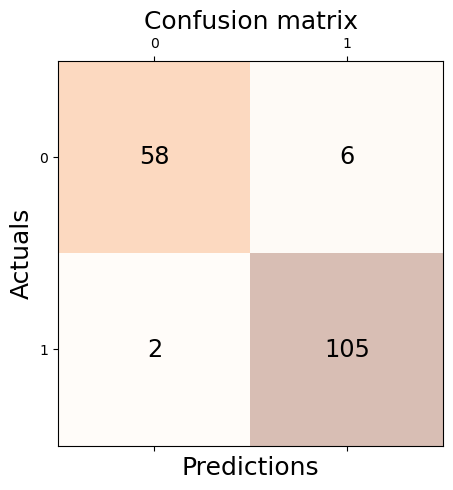

In [9]:
fig,ax=plt.subplots(figsize=(5,5)) 
ax.matshow(conf_matrix,cmap=plt.cm.Oranges,alpha=0.3)
for i in range(conf_matrix.shape[0]): 
    for j in range(conf_matrix.shape[1]): 
      ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18) 
plt.ylabel('Actuals',fontsize=18) 
plt.title('Confusion matrix',fontsize=18) 
plt.show()

In [10]:
print('Precision: %3f'%precision_score(y_test,y_pred)) 
print('Recall: %3f'%recall_score(y_test,y_pred)) 
print('Accuracy: %3f'%accuracy_score(y_test,y_pred)) 
print('F1 Score: %3f'%f1_score(y_test,y_pred))

Precision: 0.945946
Recall: 0.981308
Accuracy: 0.953216
F1 Score: 0.963303


Agglomerative Clustering

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram,linkage

In [47]:
x=[4,5,10,4,3,11,14,6,10,12] 
y=[21,19,24,17,16,25,24,22,21,21]

In [48]:
data=list(zip(x,y)) 
hierarchical_cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward') 
labels=hierarchical_cluster.fit_predict(data)

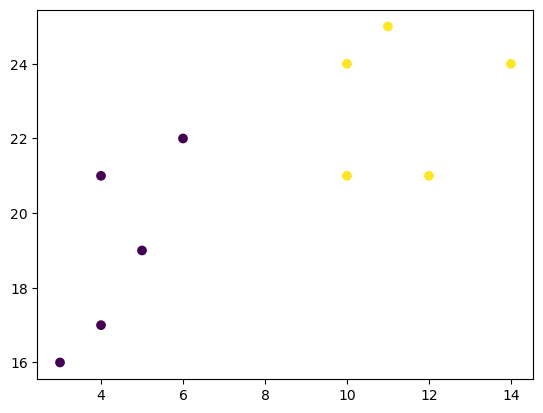

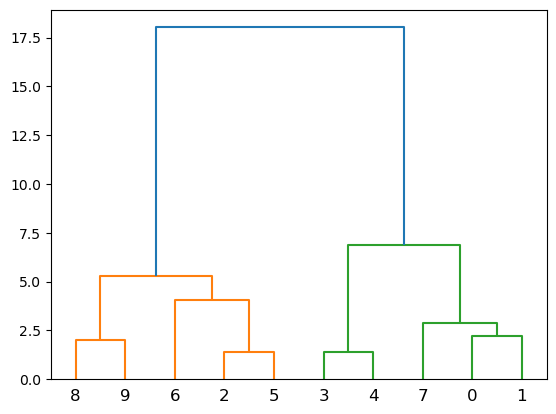

[0 0 1 0 0 1 1 0 1 1]


In [49]:
plt.scatter(x,y,c=labels) 
plt.show() 
linkage_data=linkage(data,method='ward',metric='euclidean') 
dendrogram(linkage_data) 
plt.show() 
print(labels)

Text Classification

In [11]:
import numpy as np 
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline 
from sklearn import metrics 
import nltk 
from nltk.corpus import stopwords 
import string 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data=fetch_20newsgroups(subset='all')

In [13]:
def preprocess(text):
    text=''.join([char for char in text if char not in string.punctuation]) 
    tokens=text.split() 
    tokens=[word for word in tokens if word.lower() not in stopwords.words('english')] 
    return ''.join(tokens)

In [14]:
data.data=[preprocess(text) for text in data.data] 
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [15]:
model=make_pipeline(TfidfVectorizer(),SVC(kernel='linear')) 
model.fit(X_train,y_train) 
predicted=model.predict(X_test) 

In [16]:
accuracy=metrics.accuracy_score(y_test,predicted) 
print(f'Accuracy: {accuracy}') 
print(metrics.classification_report(y_test,predicted,target_names=data.target_names))

Accuracy: 0.04456233421750663
                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       151
           comp.graphics       0.00      0.00      0.00       202
 comp.os.ms-windows.misc       0.00      0.00      0.00       195
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       183
   comp.sys.mac.hardware       0.00      0.00      0.00       205
          comp.windows.x       0.00      0.00      0.00       215
            misc.forsale       0.00      0.00      0.00       193
               rec.autos       0.00      0.00      0.00       196
         rec.motorcycles       0.04      1.00      0.09       168
      rec.sport.baseball       0.00      0.00      0.00       211
        rec.sport.hockey       0.00      0.00      0.00       198
               sci.crypt       0.00      0.00      0.00       201
         sci.electronics       0.00      0.00      0.00       202
                 sci.med       0.00      0.00

D:\Documents\one\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Documents\one\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Documents\one\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
